Perform Regression analysis  and predict the sales on advertising.csv dataset 

    1. divide dataset into x & y

    2.divide into training and testing set

    3. perform Linear Regression
    
    4. Display Regression Coefficient & do the interpretation of it

    5. show evalution metrics usng mae, mse, rmse and r2 score



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
df=pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


# Checking Null values

In [6]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

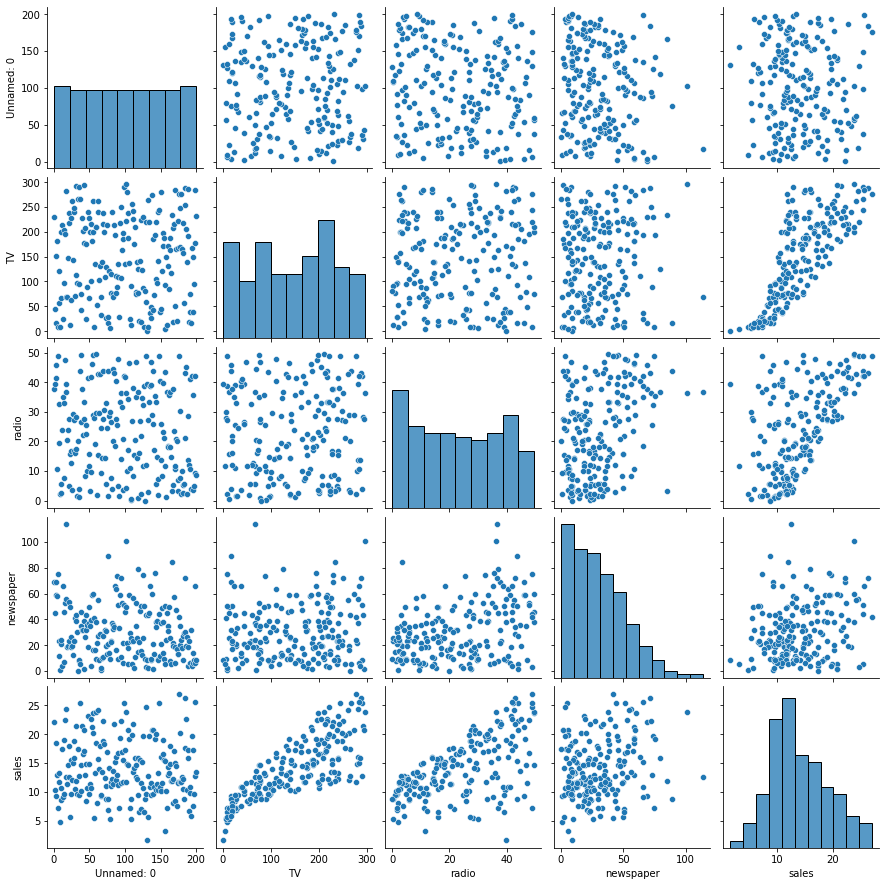

In [7]:
sns.pairplot(df)

# Q.Create a linear model plot (using seaborn's lmplot) of sales  vs. radio

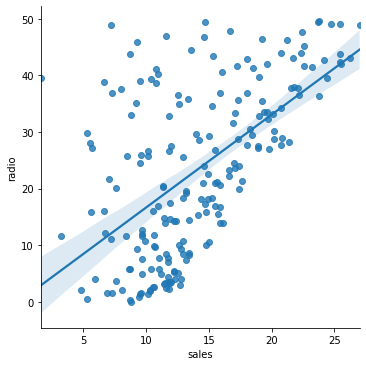

In [8]:
sns.lmplot(x='sales',y="radio",data=df)

# Q.Do the same but with the Tv column instead.


<Figure size 504x504 with 0 Axes>

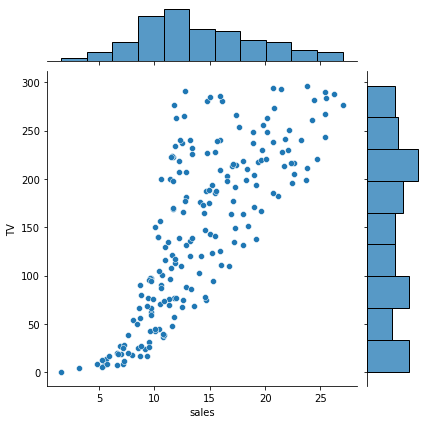

In [9]:
plt.figure(figsize=(7,7))
sns.jointplot(x="sales",y="TV",data=df)
plt.show()

# Q.Use jointplot to create a 2D hex bin plot comparing T sales and Radio.


<Figure size 504x504 with 0 Axes>

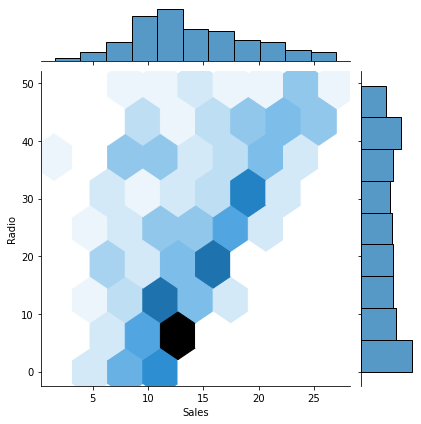

In [10]:
plt.figure(figsize=(7,7))
sns.jointplot(x="sales",y="radio",data=df,kind="hex")
plt.xlabel("Sales")
plt.ylabel("Radio")
plt.show()

# Divide dataset into x & y

In [11]:
x=df.iloc[:,:4].values
x

array([[  1. , 230.1,  37.8,  69.2],
       [  2. ,  44.5,  39.3,  45.1],
       [  3. ,  17.2,  45.9,  69.3],
       [  4. , 151.5,  41.3,  58.5],
       [  5. , 180.8,  10.8,  58.4],
       [  6. ,   8.7,  48.9,  75. ],
       [  7. ,  57.5,  32.8,  23.5],
       [  8. , 120.2,  19.6,  11.6],
       [  9. ,   8.6,   2.1,   1. ],
       [ 10. , 199.8,   2.6,  21.2],
       [ 11. ,  66.1,   5.8,  24.2],
       [ 12. , 214.7,  24. ,   4. ],
       [ 13. ,  23.8,  35.1,  65.9],
       [ 14. ,  97.5,   7.6,   7.2],
       [ 15. , 204.1,  32.9,  46. ],
       [ 16. , 195.4,  47.7,  52.9],
       [ 17. ,  67.8,  36.6, 114. ],
       [ 18. , 281.4,  39.6,  55.8],
       [ 19. ,  69.2,  20.5,  18.3],
       [ 20. , 147.3,  23.9,  19.1],
       [ 21. , 218.4,  27.7,  53.4],
       [ 22. , 237.4,   5.1,  23.5],
       [ 23. ,  13.2,  15.9,  49.6],
       [ 24. , 228.3,  16.9,  26.2],
       [ 25. ,  62.3,  12.6,  18.3],
       [ 26. , 262.9,   3.5,  19.5],
       [ 27. , 142.9,  29.3,  12.6],
 

In [12]:
y=df.iloc[:,4].values
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

# divide into training and testing set 

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)

In [15]:
xtrain

array([[ 17. ,  67.8,  36.6, 114. ],
       [187. , 139.5,   2.1,  26.6],
       [145. ,  96.2,  14.8,  38.9],
       [122. ,  18.8,  21.7,  50.4],
       [ 81. ,  76.4,  26.7,  22.3],
       [ 19. ,  69.2,  20.5,  18.3],
       [ 79. ,   5.4,  29.9,   9.4],
       [ 49. , 227.2,  15.8,  49.9],
       [  5. , 180.8,  10.8,  58.4],
       [ 16. , 195.4,  47.7,  52.9],
       [  2. ,  44.5,  39.3,  45.1],
       [ 44. , 206.9,   8.4,  26.4],
       [103. , 280.2,  10.1,  21.4],
       [165. , 117.2,  14.7,   5.4],
       [ 10. , 199.8,   2.6,  21.2],
       [156. ,   4.1,  11.6,   5.7],
       [ 37. , 266.9,  43.8,   5. ],
       [191. ,  39.5,  41.1,   5.8],
       [ 34. , 265.6,  20. ,   0.3],
       [ 46. , 175.1,  22.5,  31.5],
       [ 86. , 193.2,  18.4,  65.7],
       [184. , 287.6,  43. ,  71.8],
       [128. ,  80.2,   0. ,   9.2],
       [ 54. , 182.6,  46.2,  58.7],
       [101. , 222.4,   4.3,  49.8],
       [ 94. , 250.9,  36.5,  72.3],
       [155. , 187.8,  21.1,   9.5],
 

In [16]:
xtest

array([[ 38. ,  74.7,  49.4,  45.7],
       [110. , 255.4,  26.9,   5.5],
       [ 32. , 112.9,  17.4,  38.6],
       [ 90. , 109.8,  47.8,  51.4],
       [ 67. ,  31.5,  24.6,   2.2],
       [120. ,  19.4,  16. ,  22.3],
       [ 55. , 262.7,  28.8,  15.9],
       [ 75. , 213.4,  24.6,  13.1],
       [146. , 140.3,   1.9,   9. ],
       [143. , 220.5,  33.2,  37.9],
       [149. ,  38. ,  40.3,  11.9],
       [113. , 175.7,  15.4,   2.4],
       [175. , 222.4,   3.4,  13.1],
       [ 56. , 198.9,  49.4,  60. ],
       [142. , 193.7,  35.4,  75.6],
       [150. ,  44.7,  25.8,  20.6],
       [ 26. , 262.9,   3.5,  19.5],
       [ 35. ,  95.7,   1.4,   7.4],
       [171. ,  50. ,  11.6,  18.4],
       [ 40. , 228. ,  37.7,  32. ],
       [173. ,  19.6,  20.1,  17. ],
       [154. , 171.3,  39.7,  37.7],
       [176. , 276.9,  48.9,  41.8],
       [ 62. , 261.3,  42.7,  54.7],
       [ 66. ,  69. ,   9.3,   0.9],
       [ 51. , 199.8,   3.1,  34.6],
       [ 43. , 293.6,  27.7,   1.8],
 

In [17]:
ytrain

array([12.5, 10.3, 11.4,  7. , 11.8, 11.3,  5.3, 14.8, 12.9, 22.4, 10.4,
       12.9, 14.8, 11.9, 10.6,  3.2, 25.4, 10.8, 17.4, 14.9, 15.2, 26.2,
        8.8, 21.2, 11.7, 22.2, 15.6, 14.6, 15.9, 18. , 11.9,  9.7, 15.9,
        9.4,  9.7, 22.6, 13.3, 25.4,  5.5, 13.4, 16.1, 12.9,  8.7, 22.6,
       19.6, 15.9,  5.9, 12.2, 20.7, 12.8,  7.3, 12.5, 11.6, 10.5, 11.7,
       15.5, 10.6, 14.2, 13.2, 11.3, 13.4, 25.4, 11. , 10.8, 15.5, 18.9,
        5.3, 16.6, 23.8, 11.7, 12.9, 11.8, 10.7, 20.2, 17.3, 22.3, 19. ,
       12.7, 21.7, 12.2, 18.5, 14.4, 12.8, 11.5, 15.9, 20.7, 15.2, 25.5,
       19.4, 23.8,  1.6, 23.2,  8. , 15. , 11.6, 12. , 18. , 18. , 11.6,
        8.6, 21.4, 14.5, 19.7, 15.5, 24.4, 17.6,  7.2, 12.2, 22.1, 11.7,
       10.4, 15.3, 12.4, 13.2, 11. , 10.1, 14.7, 15. , 13.2,  6.7, 18.9,
       17.2, 15.7,  4.8, 19.2, 24.7, 17.3,  8.7,  6.9,  9.6,  6.6, 14.6,
        8.8,  8.5, 14.9, 18.4, 11.8, 10.1, 12.6,  9.5, 21.8, 13.6,  9.7,
        9.9, 10.9,  7.2, 13.4,  8.1, 17.1,  7.6,  5

In [18]:
ytest

array([14.7, 19.8, 11.9, 16.7,  9.5,  6.6, 20.2, 17. , 10.3, 20.1, 10.9,
       14.1, 11.5, 23.7, 19.2, 10.1, 12. ,  9.5,  8.4, 21.5,  7.6, 19. ,
       27. , 24.2,  9.3, 11.4, 20.7,  9.7, 12.6,  9.3,  9.2, 19.6, 11.2,
        5.6, 17.1,  9.6, 10.6,  9.7,  7.3, 10.5])

# Creating Linear Regresstion Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
l= LinearRegression()
l.fit(xtrain,ytrain)

LinearRegression()

# Prediction for our model

In [21]:
ypred=l.predict(xtest)
ypred

array([15.76749396, 19.58965388, 11.45024677, 16.96598072,  9.06935614,
        6.79469032, 20.37314931, 17.30663398,  9.56760515, 19.13483775,
       12.19503688, 13.79007528, 13.52608778, 21.36855599, 18.32810818,
        9.74806028, 15.6380578 ,  7.64091526,  7.26257563, 20.50673845,
        7.49045873, 18.11494247, 24.61063566, 22.92154434,  7.8742574 ,
       12.65231352, 21.59097002,  7.83861627, 12.18948424, 12.54990222,
       10.7868209 , 19.17367113,  9.95848227,  6.65499137, 17.37285358,
        7.72585195,  9.06417542,  7.95647557, 10.33213944, 10.37966653])

# Q.Create a scatterplot of the real ytest values versus the ypred  values.


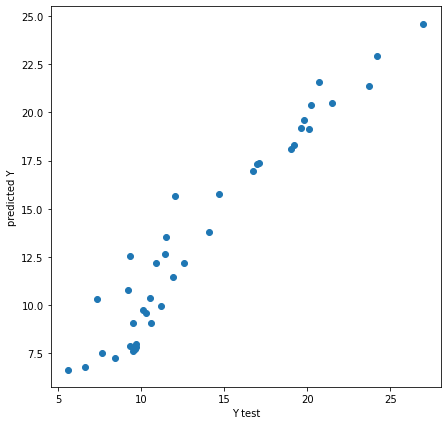

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(x=ytest,y=ypred)
plt.xlabel("Y test") 
plt.ylabel("predicted Y")
plt.show()

# Model Evaluation

In [23]:
l.intercept_

3.0954276796907845

In [24]:
l.coef_

array([-0.00172413,  0.04537511,  0.18945798, -0.00024425])

# Regression Evaluation metrics

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
print(f"MAError :   {mean_absolute_error(ytest,ypred)}")
print(f"MsEError :  {mean_squared_error(ytest,ypred)}")
print(f"RMAEError : {np.sqrt(mean_squared_error(ytest,ypred))}")
print(f"r2 :        {r2_score(ytest,ypred)}")

MAError :   1.1563032763047059
MsEError :  2.117970006668225
RMAEError : 1.4553247083273977
r2 :        0.9284717132168754
